In [1]:
# Import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import seaborn as sns
from shapely.geometry import box
import geopandas as gpd
import earthpy as et
import contextily as cx

# Adjust plot font sizes
sns.set(font_scale=1.5)
sns.set_style("white")

# Set working dir & get data
data = et.data.get_data('spatial-vector-lidar')
source_folder = os.path.join(et.io.HOME, 'earth-analytics')
destination_folder = os.path.join(os.getcwd(), 'data')
os.rename(source_folder, destination_folder)

Extracted output to /home/tristannew/earth-analytics/data/spatial-vector-lidar/.


In [2]:
# Define base path as it is repeated below
base_path = os.path.join("data", "data", "spatial-vector-lidar")

# Define file paths
country_boundary_path = os.path.join(base_path, "usa", 
                                     "usa-boundary-dissolved.shp")

state_boundary_path = os.path.join(base_path, "usa", 
                                   "usa-states-census-2014.shp")

pop_places_path = os.path.join(base_path, "global", "ne_110m_populated_places_simple", 
                               "ne_110m_populated_places_simple.shp")

# Import the data
country_boundary_us = gpd.read_file(country_boundary_path)
state_boundary_us = gpd.read_file(state_boundary_path)
pop_places = gpd.read_file(pop_places_path)

In [3]:
state_boundary_us.geom_type.head()

0    MultiPolygon
1         Polygon
2    MultiPolygon
3         Polygon
4         Polygon
dtype: object

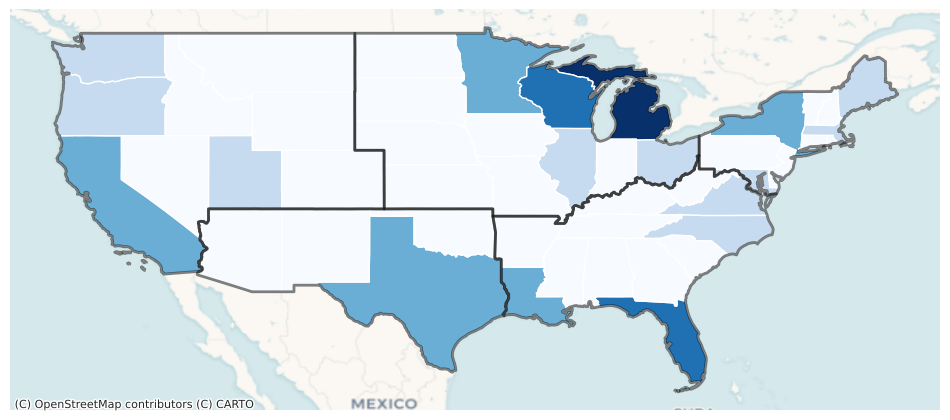

In [40]:
import contextily as cx

f, ax = plt.subplots(figsize=(12,12))

state_boundary_us.plot(
    ax=ax,
    column="AWATER",
    cmap="Blues",
    scheme="FisherJenks"
)

state_boundary_us.dissolve(by="region", aggfunc="sum").reset_index().plot(
    ax=ax,
    column="region",
    alpha=0.5,
    categorical=True,
    facecolor="none",
    linewidth=2,
    edgecolor="black"
)
ax.set_axis_off()
cx.add_basemap(ax=ax, crs=state_boundary_us.crs, source=cx.providers.CartoDB.Voyager)

In [41]:
# Select the columns that you wish to retain in the data
state_boundary = state_boundary_us[['region', 'geometry', 'ALAND', 'AWATER']]

# Then summarize the quantative columns by 'sum'
regions_agg = state_boundary.dissolve(by='region', aggfunc='sum')

# Convert area units from square meters to hectares (divide by 10,000)
regions_agg["land_ha"] = regions_agg["ALAND"] / 10000
regions_agg["water_ha"] = regions_agg["AWATER"] / 10000
regions_agg

,geometry,ALAND,AWATER,land_ha,water_ha
region,,,,,
Midwest,"MULTIPOLYGON Z (((-89.12047 36.89190 0.00000, ...",1943869253244,184383393833,1.943869e+08,1.843834e+07
Northeast,"MULTIPOLYGON Z (((-76.04621 38.02553 0.00000, ...",869066138232,108922434345,8.690661e+07,1.089224e+07
Southeast,"MULTIPOLYGON Z (((-81.44310 30.60094 0.00000, ...",1364632039655,103876652998,1.364632e+08,1.038767e+07
Southwest,"POLYGON Z ((-94.41906 33.57722 0.00000, -94.38...",1462631530997,24217682268,1.462632e+08,2.421768e+06
West,"MULTIPOLYGON Z (((-118.35350 32.82196 0.00000,...",2432336444730,57568049509,2.432336e+08,5.756805e+06


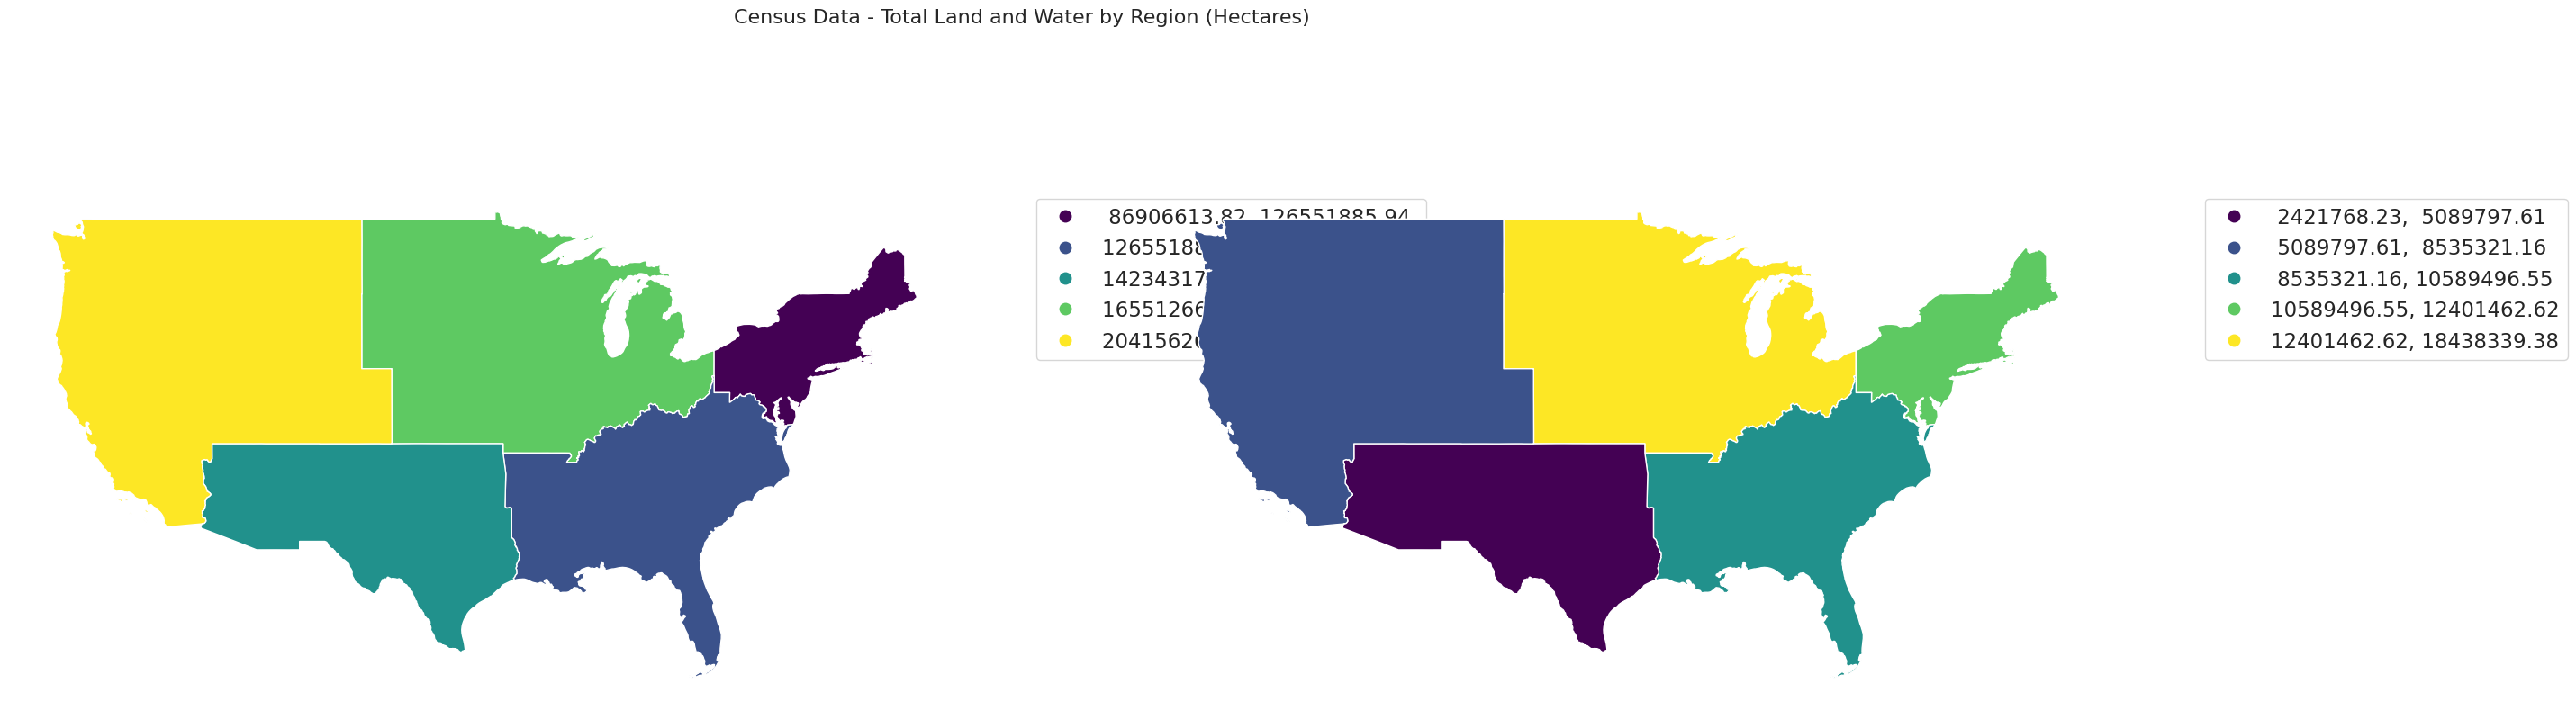

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))

regions_agg.plot(column='land_ha',
                 legend=True,
                 scheme="quantiles",
                 ax=ax1)

regions_agg.plot(column='water_ha',
                 scheme="quantiles",
                 legend=True,
                 ax=ax2)

plt.suptitle('Census Data - Total Land and Water by Region (Hectares)', fontsize=16)
leg = ax1.get_legend()
leg.set_bbox_to_anchor((1.5,1))

leg = ax2.get_legend()
leg.set_bbox_to_anchor((1.5,1))
ax1.set_axis_off()
ax2.set_axis_off()

plt.show()